   age  sex  chest pain type  resting bp s  cholesterol  fasting blood sugar  \
0   40    1                2           140          289                    0   
1   49    0                3           160          180                    0   
2   37    1                2           130          283                    0   
3   48    0                4           138          214                    0   
4   54    1                3           150          195                    0   

   resting ecg  max heart rate  exercise angina  oldpeak  ST slope  target  
0            0             172                0      0.0         1       0  
1            0             156                0      1.0         2       1  
2            1              98                0      0.0         1       0  
3            0             108                1      1.5         2       1  
4            0             122                0      0.0         1       0  
               age          sex  chest pain type  resting

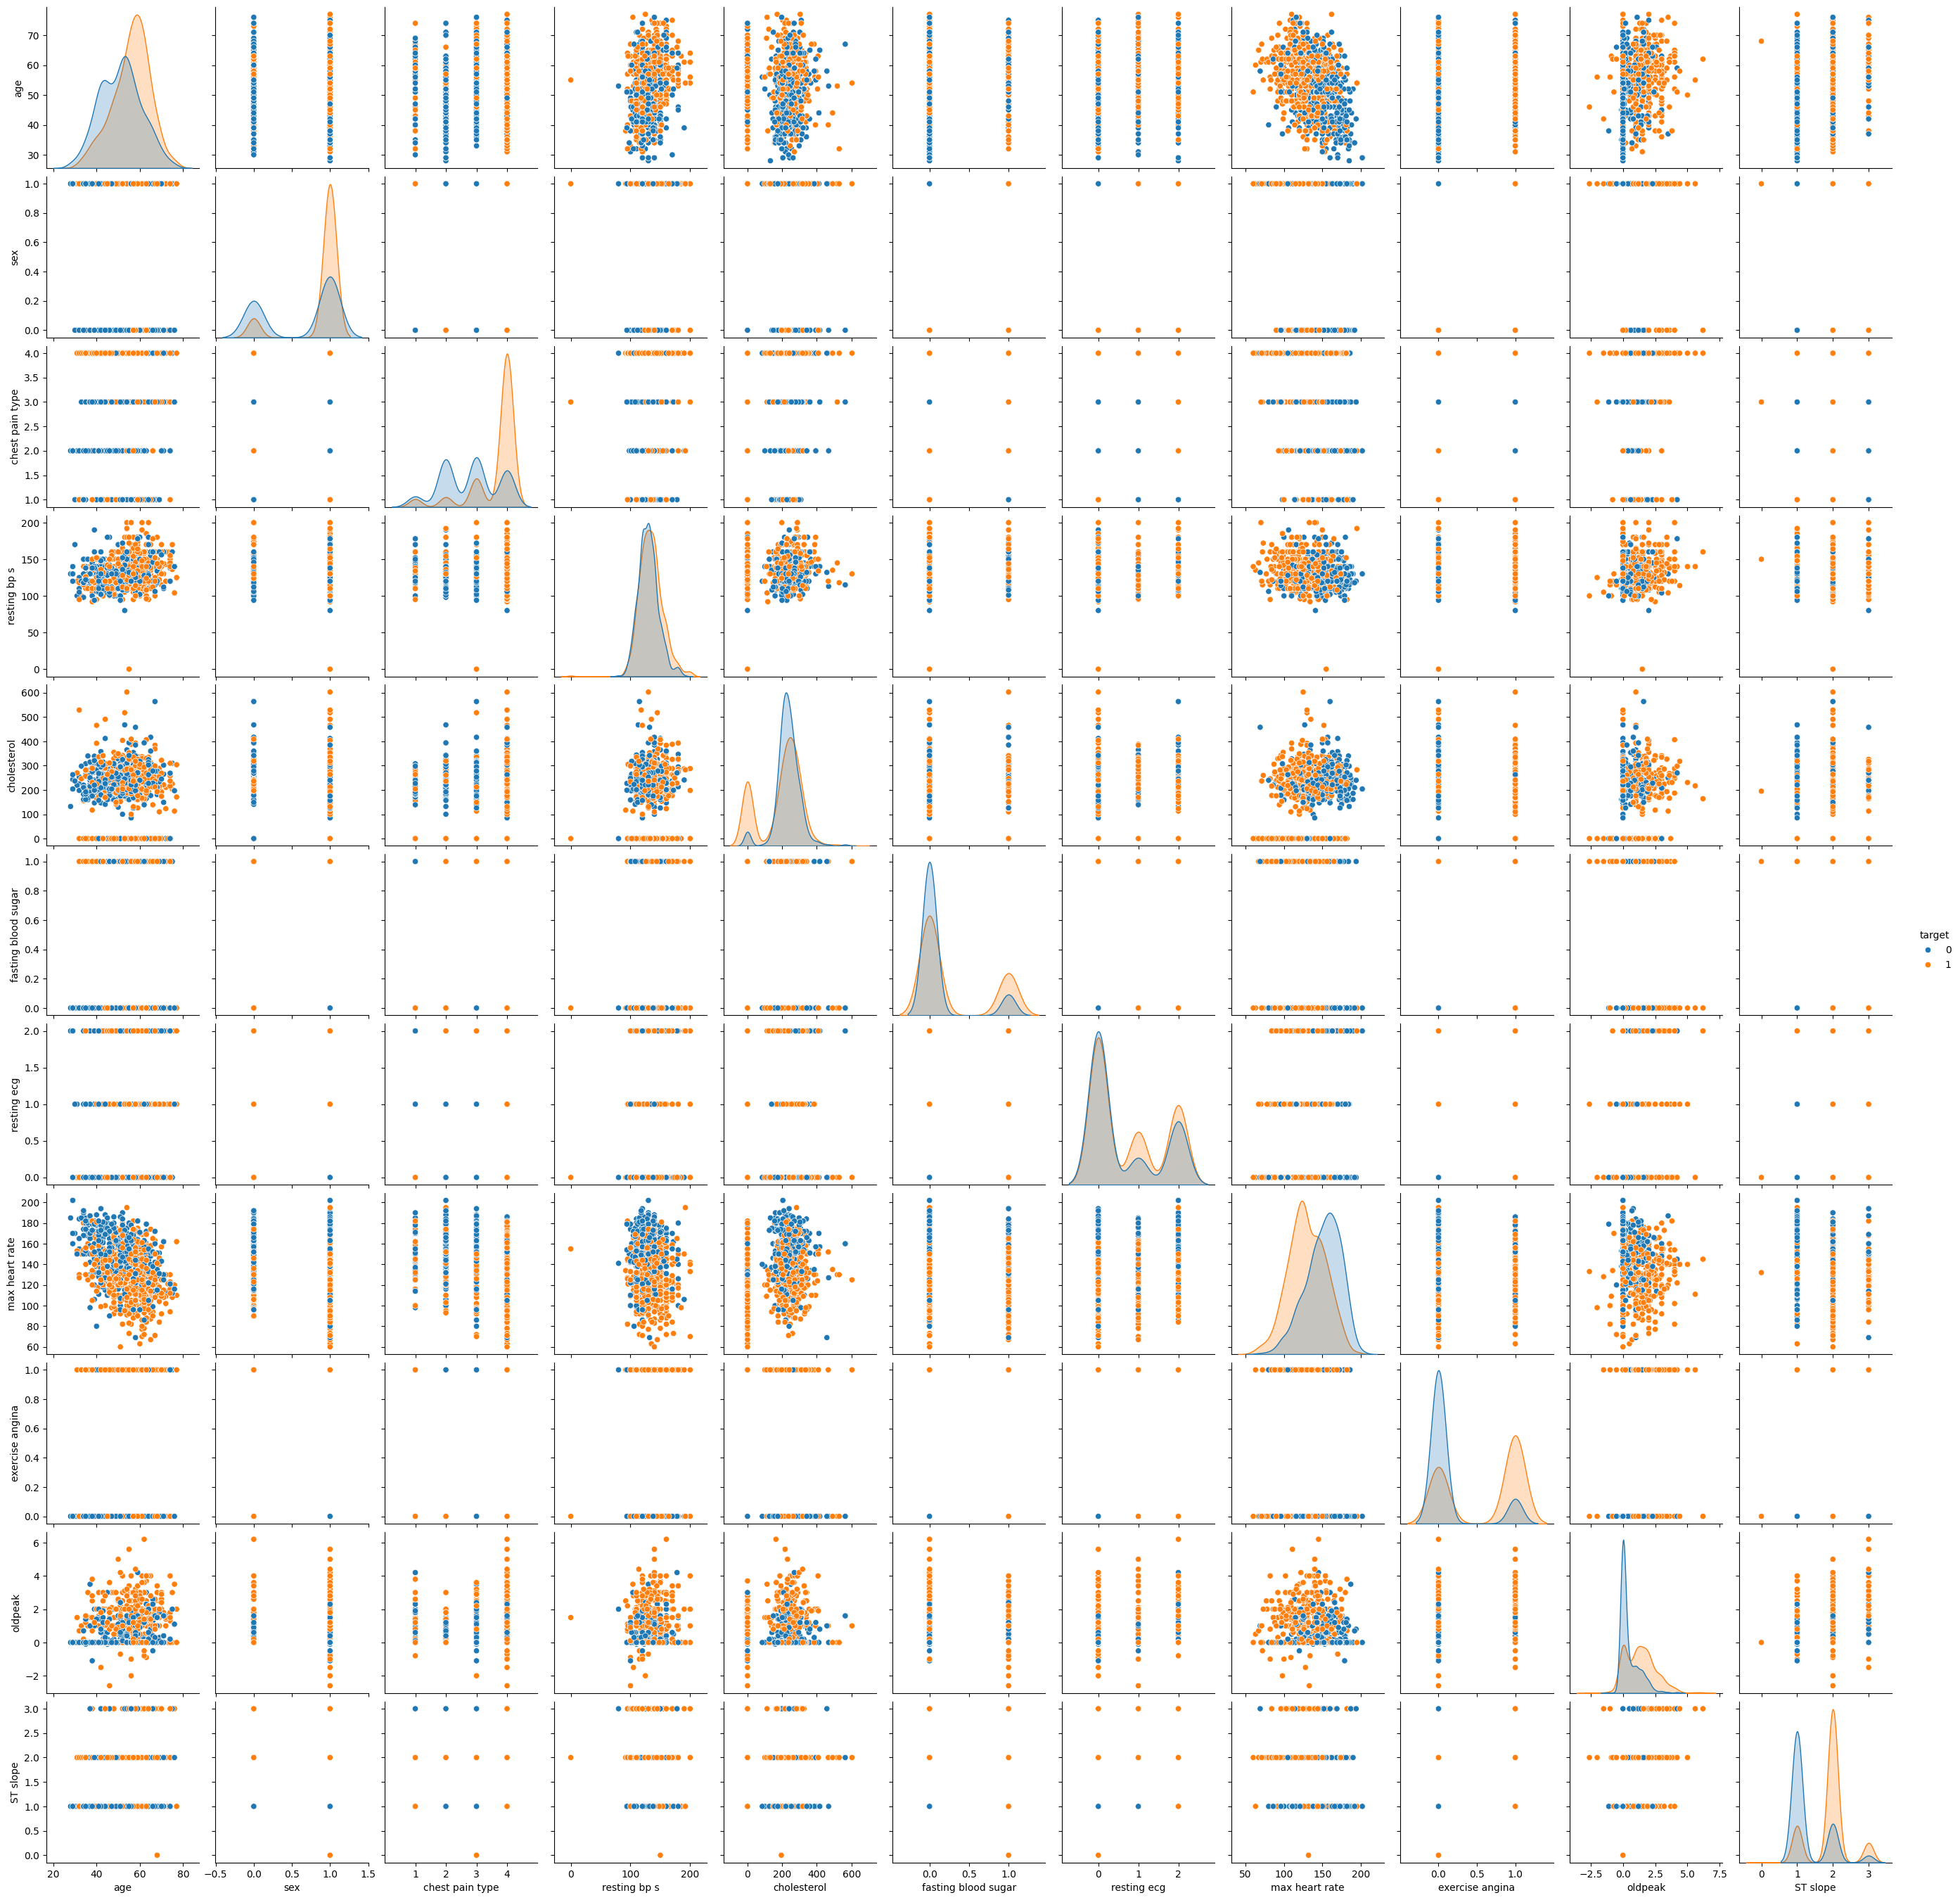

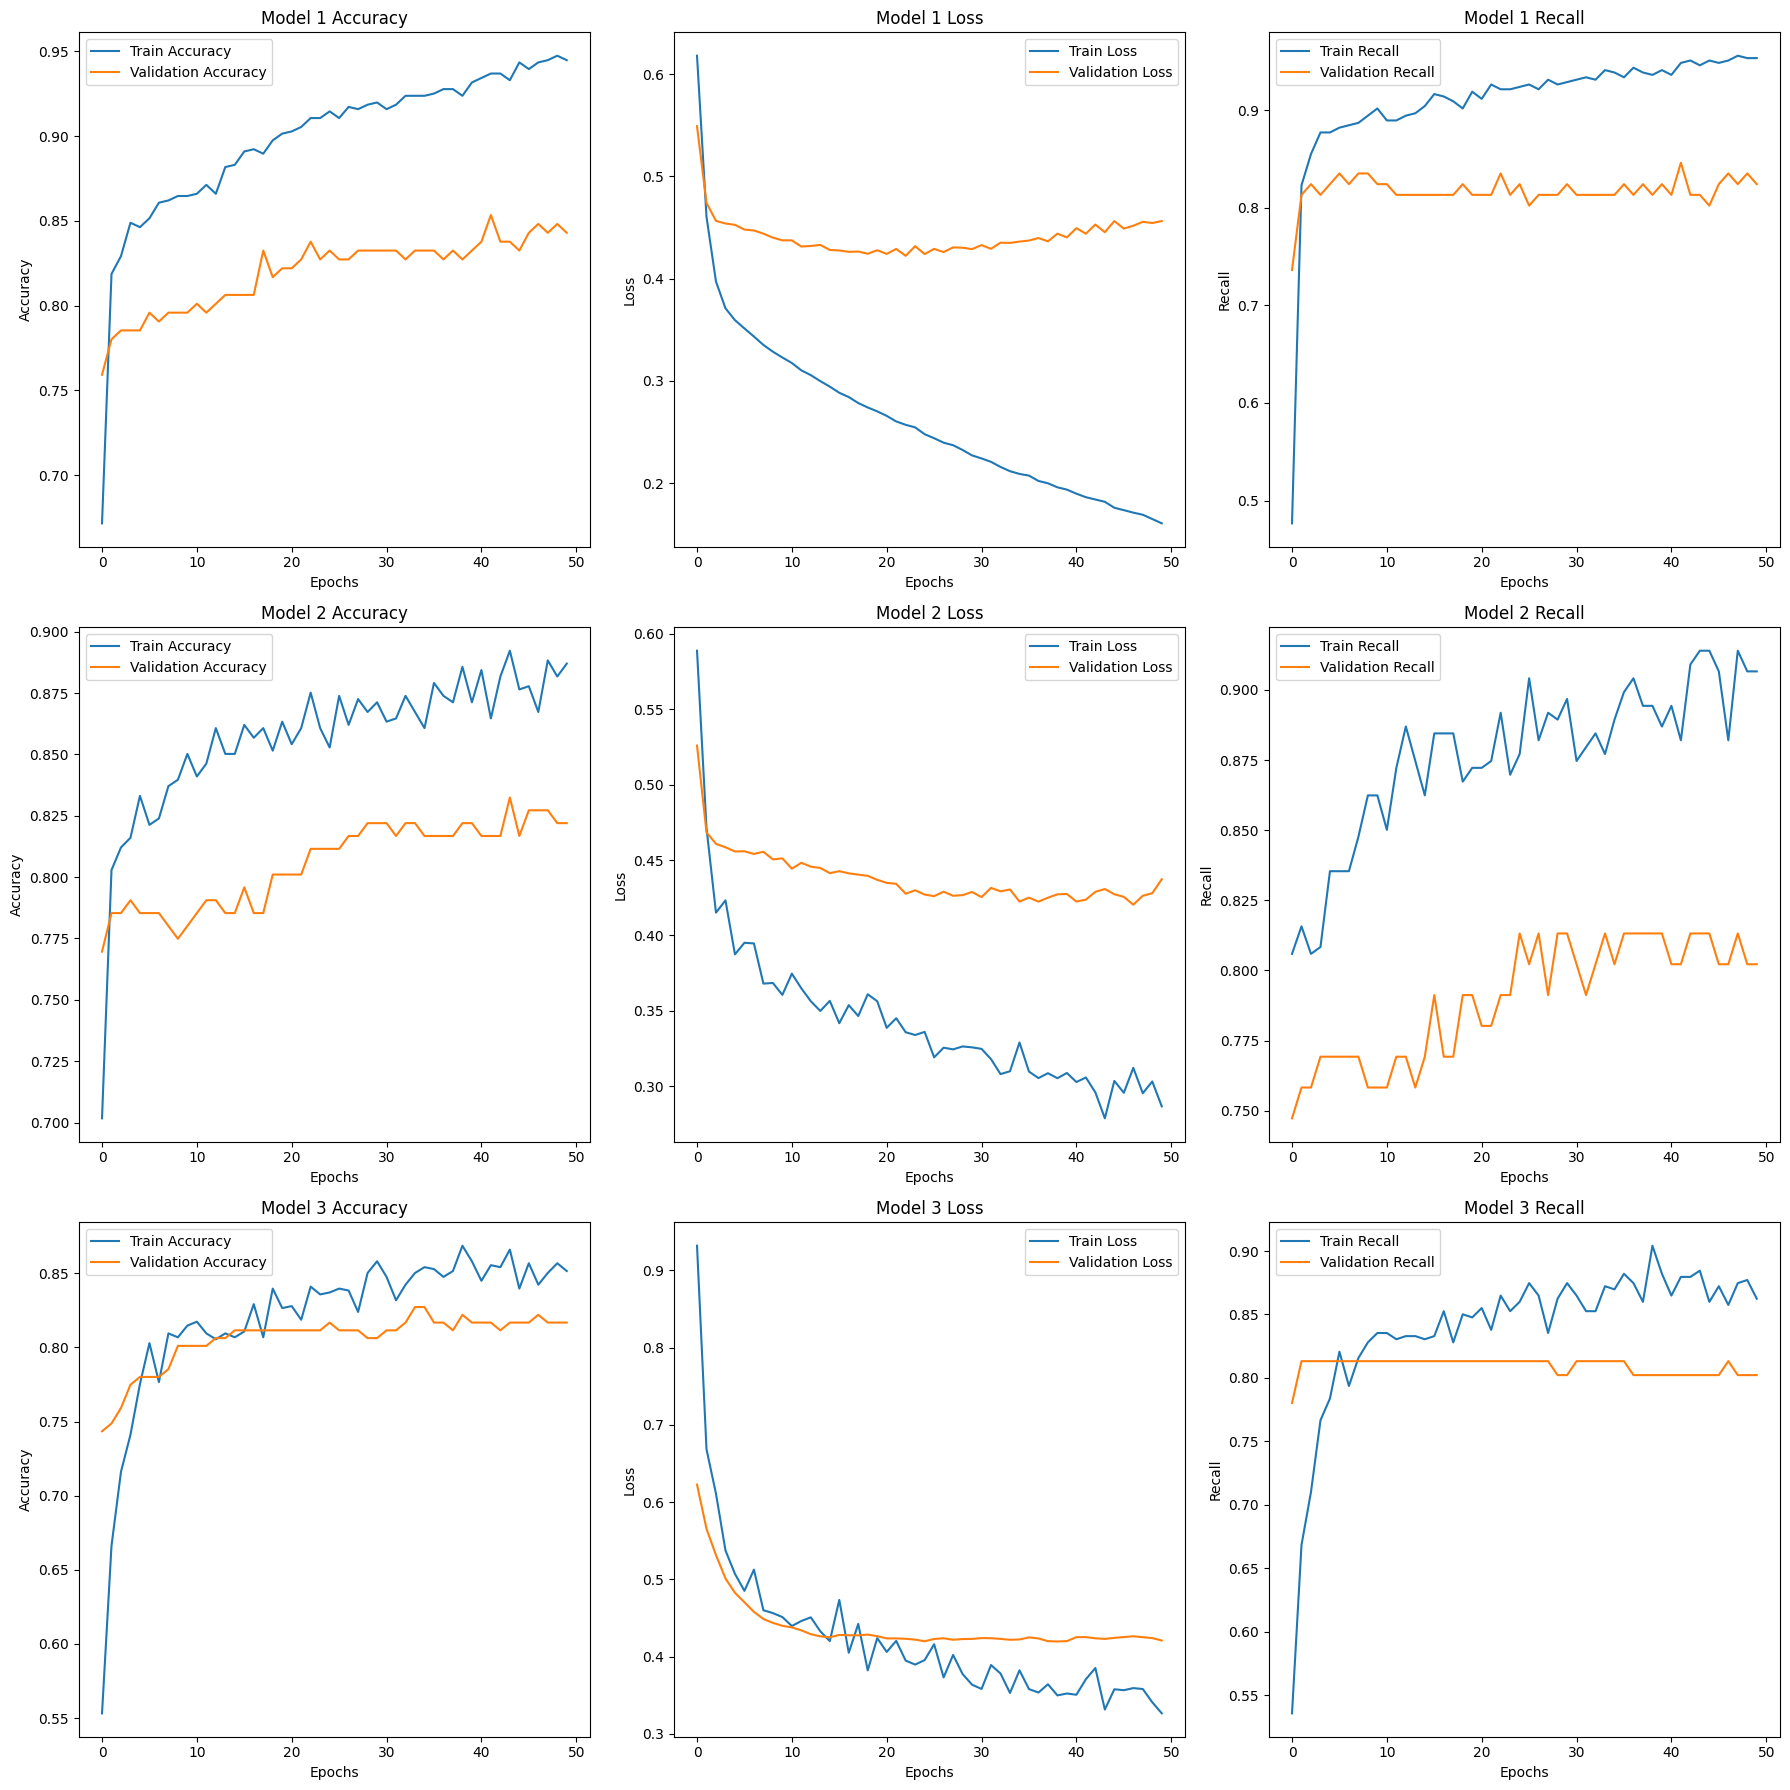

Model 1 Accuracy: 89.50%
Model 1 Recall: 90.84%
Model 2 Accuracy: 88.66%
Model 2 Recall: 91.60%
Model 3 Accuracy: 88.66%
Model 3 Recall: 90.84%
8/8 [==============================] - 0s 3ms/step
Model 1 Confusion Matrix:
[[ 94  13]
 [ 12 119]]


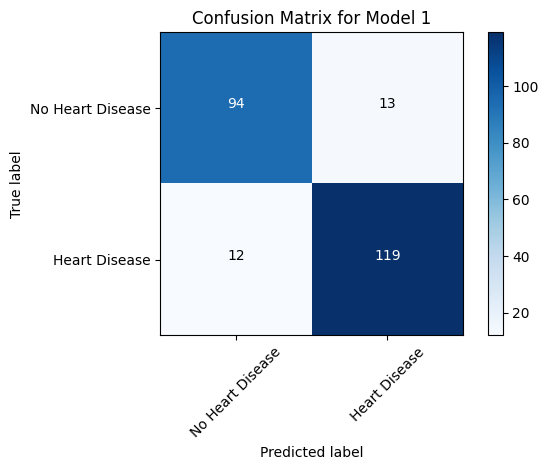

Model 1 Accuracy: 89.50%
Model 1 Recall: 90.84%
Classification Report for Model 1:
                  precision    recall  f1-score   support

No Heart Disease       0.89      0.88      0.88       107
   Heart Disease       0.90      0.91      0.90       131

        accuracy                           0.89       238
       macro avg       0.89      0.89      0.89       238
    weighted avg       0.89      0.89      0.89       238


--- Analysis ---
For Model 1, the classifier has an accuracy of 89.50% on the test data.
The recall for Model 1 is 90.84%, indicating how many actual positives were identified.
Confusion matrix shows the true positives, false positives, true negatives, and false negatives.

8/8 [==============================] - 0s 3ms/step
Model 2 Confusion Matrix:
[[ 91  16]
 [ 11 120]]


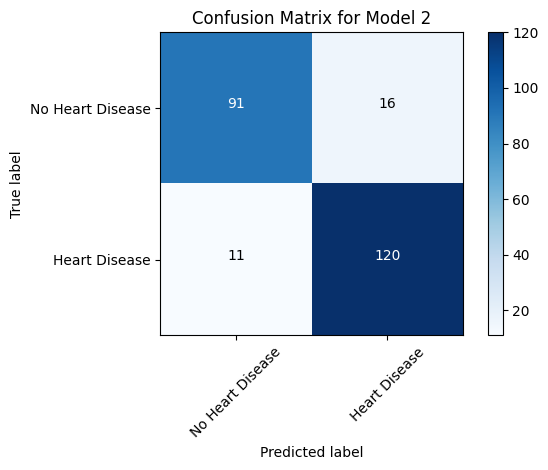

Model 2 Accuracy: 88.66%
Model 2 Recall: 91.60%
Classification Report for Model 2:
                  precision    recall  f1-score   support

No Heart Disease       0.89      0.85      0.87       107
   Heart Disease       0.88      0.92      0.90       131

        accuracy                           0.89       238
       macro avg       0.89      0.88      0.88       238
    weighted avg       0.89      0.89      0.89       238


--- Analysis ---
For Model 2, the classifier has an accuracy of 88.66% on the test data.
The recall for Model 2 is 91.60%, indicating how many actual positives were identified.
Confusion matrix shows the true positives, false positives, true negatives, and false negatives.

8/8 [==============================] - 0s 3ms/step
Model 3 Confusion Matrix:
[[ 92  15]
 [ 12 119]]


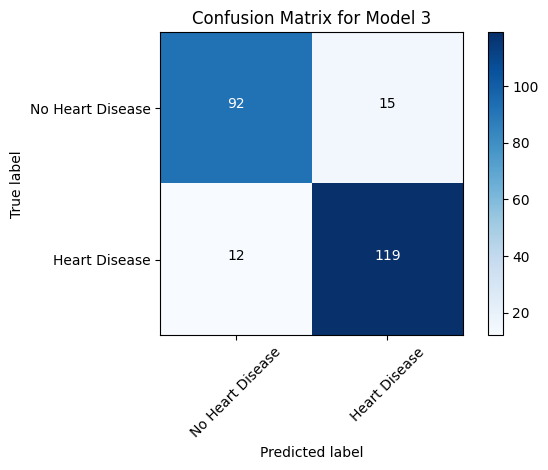

Model 3 Accuracy: 88.66%
Model 3 Recall: 90.84%
Classification Report for Model 3:
                  precision    recall  f1-score   support

No Heart Disease       0.88      0.86      0.87       107
   Heart Disease       0.89      0.91      0.90       131

        accuracy                           0.89       238
       macro avg       0.89      0.88      0.89       238
    weighted avg       0.89      0.89      0.89       238


--- Analysis ---
For Model 3, the classifier has an accuracy of 88.66% on the test data.
The recall for Model 3 is 90.84%, indicating how many actual positives were identified.
Confusion matrix shows the true positives, false positives, true negatives, and false negatives.



In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.models import Model
from keras.layers import Input, Dense, Dropout, BatchNormalization
from keras.metrics import Recall
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('./heart_statlog_cleveland_hungary_final.csv')

# Exploratory Data Analysis
print(data.head())
print(data.describe())
sns.pairplot(data, hue='target')

# Preprocessing
X = data.drop('target', axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Neural Network Architectures
def build_model(input_shape, layers, dropout_rate=None, use_batch_norm=False):
    inputs = Input(shape=input_shape)
    x = inputs
    for size in layers:
        x = Dense(size, activation='relu')(x)
        if use_batch_norm:
            x = BatchNormalization()(x)
        if dropout_rate:
            x = Dropout(dropout_rate)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=inputs, outputs=outputs)
    return model

# Model instantiation
models = [
    build_model((X_train_scaled.shape[1],), [64, 32]),
    build_model((X_train_scaled.shape[1],), [128, 64], dropout_rate=0.5),
    build_model((X_train_scaled.shape[1],), [128, 64, 32], dropout_rate=0.5, use_batch_norm=True)
]

# Train models and capture history
histories = []
for i, model in enumerate(models, start=1):
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', Recall(name='recall')])
    history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)
    histories.append(history)

# Function to plot model history
def plot_model_history(histories):
    fig, axes = plt.subplots(nrows=len(histories), ncols=3, figsize=(18, 6 * len(histories)))
    for i, history in enumerate(histories):
        axes[i, 0].plot(history.history['accuracy'], label='Train Accuracy')
        axes[i, 0].plot(history.history['val_accuracy'], label='Validation Accuracy')
        axes[i, 0].set_title(f'Model {i+1} Accuracy')
        axes[i, 0].set_xlabel('Epochs')
        axes[i, 0].set_ylabel('Accuracy')
        axes[i, 0].legend()

        axes[i, 1].plot(history.history['loss'], label='Train Loss')
        axes[i, 1].plot(history.history['val_loss'], label='Validation Loss')
        axes[i, 1].set_title(f'Model {i+1} Loss')
        axes[i, 1].set_xlabel('Epochs')
        axes[i, 1].set_ylabel('Loss')
        axes[i, 1].legend()

        axes[i, 2].plot(history.history['recall'], label='Train Recall')
        axes[i, 2].plot(history.history['val_recall'], label='Validation Recall')
        axes[i, 2].set_title(f'Model {i+1} Recall')
        axes[i, 2].set_xlabel('Epochs')
        axes[i, 2].set_ylabel('Recall')
        axes[i, 2].legend()
    plt.tight_layout()
    plt.show()

# Plot histories
plot_model_history(histories)

# Evaluate models and print accuracy and recall
for i, model in enumerate(models, start=1):
    scores = model.evaluate(X_test_scaled, y_test, verbose=0)
    print(f'Model {i} Accuracy: {scores[1]*100:.2f}%')
    print(f'Model {i} Recall: {scores[2]*100:.2f}%')



from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot the confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Class labels
class_labels = ['No Heart Disease', 'Heart Disease']

# Evaluation
for i, model in enumerate(models, start=1):
    # Predictions
    y_pred = (model.predict(X_test_scaled) > 0.5).astype(int)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f'Model {i} Confusion Matrix:')
    print(cm)

    # Plot confusion matrix
    plt.figure()
    plot_confusion_matrix(cm, classes=class_labels, title=f'Confusion Matrix for Model {i}')
    plt.show()

    # Accuracy and recall
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print(f'Model {i} Accuracy: {accuracy*100:.2f}%')
    print(f'Model {i} Recall: {recall*100:.2f}%')

    # Full classification report
    print(f'Classification Report for Model {i}:')
    print(classification_report(y_test, y_pred, target_names=class_labels))

    # Analysis of the results
    print("\n--- Analysis ---")
    print(f"For Model {i}, the classifier has an accuracy of {accuracy*100:.2f}% on the test data.")
    print(f"The recall for Model {i} is {recall*100:.2f}%, indicating how many actual positives were identified.")
    print("Confusion matrix shows the true positives, false positives, true negatives, and false negatives.\n")
